<a href="https://colab.research.google.com/github/tayyabaarooj/tayyabaarooj.github.io/blob/main/skin_cancer_malignant_vs_benign_vgg19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
train_ds="/content/drive/MyDrive/dataset/skinCancer/train"
test_ds="/content/drive/MyDrive/dataset/skinCancer/test"


# Data preprocessing
****

In [40]:
os.listdir('/content/drive/MyDrive/dataset/skinCancer/train')

['benign', 'malignant']

In [42]:
batch_size=32
img_size=224

In [43]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,
                                                target_size=(img_size, img_size),
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 2467 images belonging to 2 classes.
Found 519 images belonging to 2 classes.


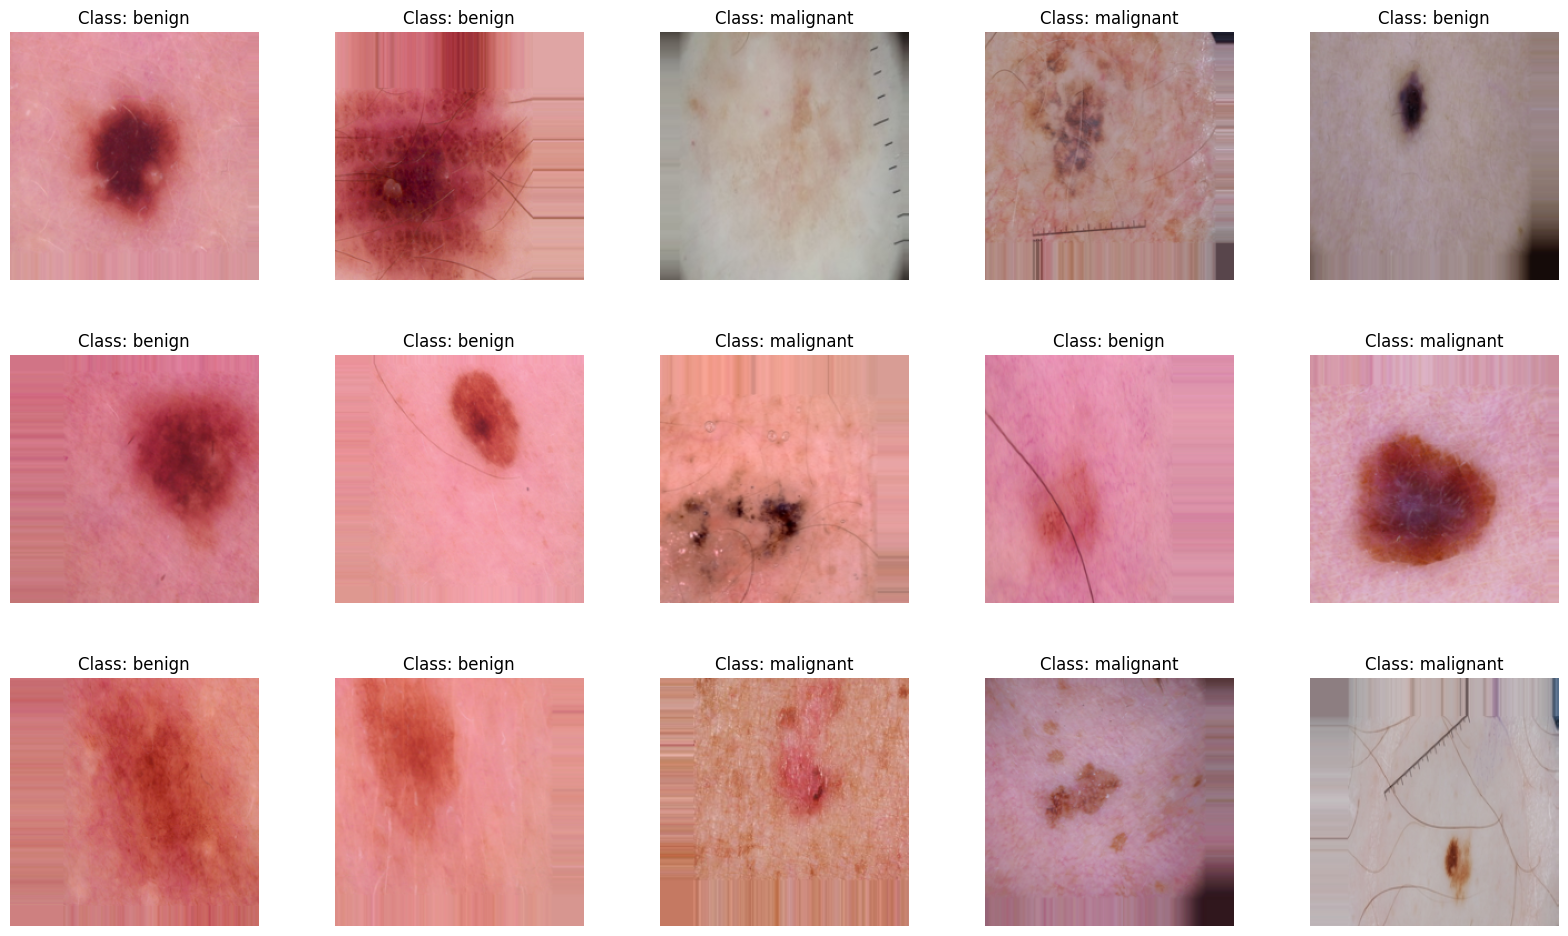

In [44]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [16]:
print(len(train_generator))
print(len(test_ds))


78
46


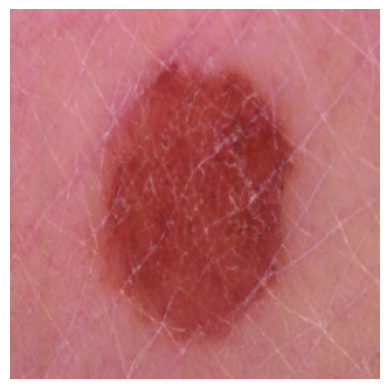

In [18]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/content/drive/MyDrive/dataset/skinCancer/train/benign/1001.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [19]:
from keras.layers import MaxPool2D

In [20]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# Build VGG_19 Model

In [21]:
from keras.layers import MaxPool2D

In [46]:
from keras.layers import MaxPool2D

In [47]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
# Define input shape
input_shape = (img_size, img_size, 3)

# Create a Sequential model
model = Sequential([
    Input(shape=input_shape),  # Specify input shape in the first layer
    Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=64, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=128, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=256, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    Conv2D(filters=512, kernel_size=(3, 3), padding="same", activation="relu"),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    Flatten(),
    Dense(units=4096, activation="relu"),
    Dense(units=4096, activation="relu"),
    Dense(units=2, activation="softmax")
])


#   Model summary

In [48]:
# Print the model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 conv2d_30 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 112, 112, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 112, 112, 128)     73856     
                                                                 
 conv2d_32 (Conv2D)          (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 56, 56, 128)       0         
 ng2D)                                                

In [49]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [50]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [51]:
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=test_generator)


Epoch 1/5
78/78 [==============================] - 66s 766ms/step - loss: 0.6505 - accuracy: 0.5979 - val_loss: 0.5314 - val_accuracy: 0.7784
Epoch 2/5
78/78 [==============================] - 59s 750ms/step - loss: 0.5066 - accuracy: 0.7645 - val_loss: 0.4741 - val_accuracy: 0.8073
Epoch 3/5
78/78 [==============================] - 56s 720ms/step - loss: 0.4697 - accuracy: 0.7754 - val_loss: 0.4757 - val_accuracy: 0.7919
Epoch 4/5
78/78 [==============================] - 56s 719ms/step - loss: 0.4435 - accuracy: 0.7977 - val_loss: 0.4046 - val_accuracy: 0.8362
Epoch 5/5
78/78 [==============================] - 56s 718ms/step - loss: 0.4242 - accuracy: 0.7957 - val_loss: 0.4295 - val_accuracy: 0.8170


In [52]:
n_categories = len(os.listdir('/content/drive/MyDrive/dataset/skinCancer/test'))# number of categories print(n_categories)

In [53]:
n_categories

2

In [54]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.650473,0.597892,0.531360,0.778420
1,0.506567,0.764491,0.474140,0.807322
2,0.469691,0.775436,0.475708,0.791907
3,0.443517,0.797730,0.404578,0.836223
4,0.424218,0.795703,0.429497,0.816956


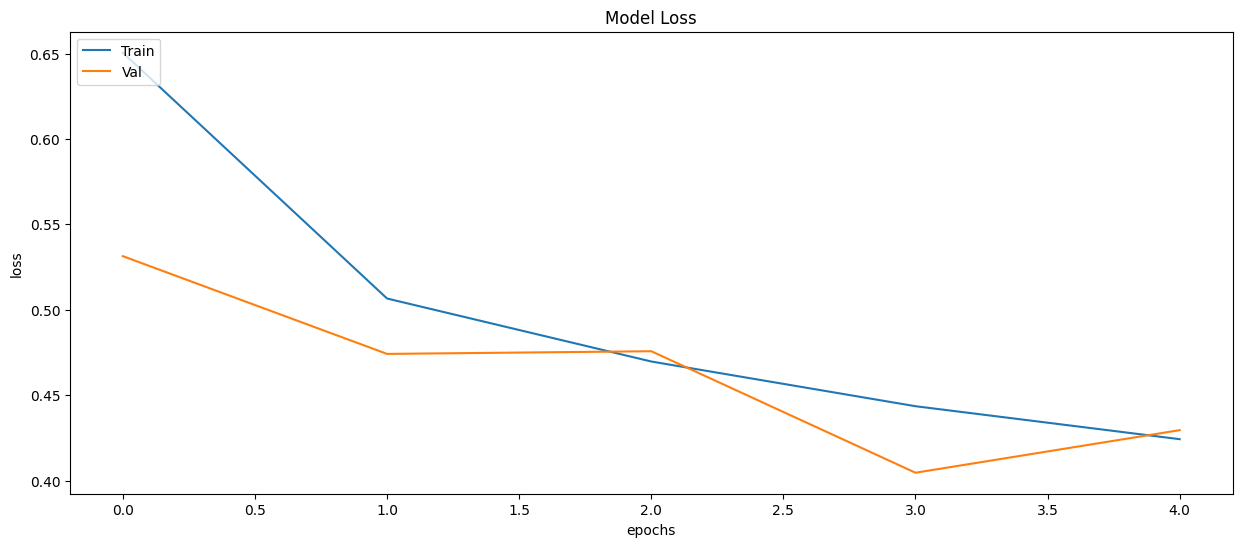

In [55]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

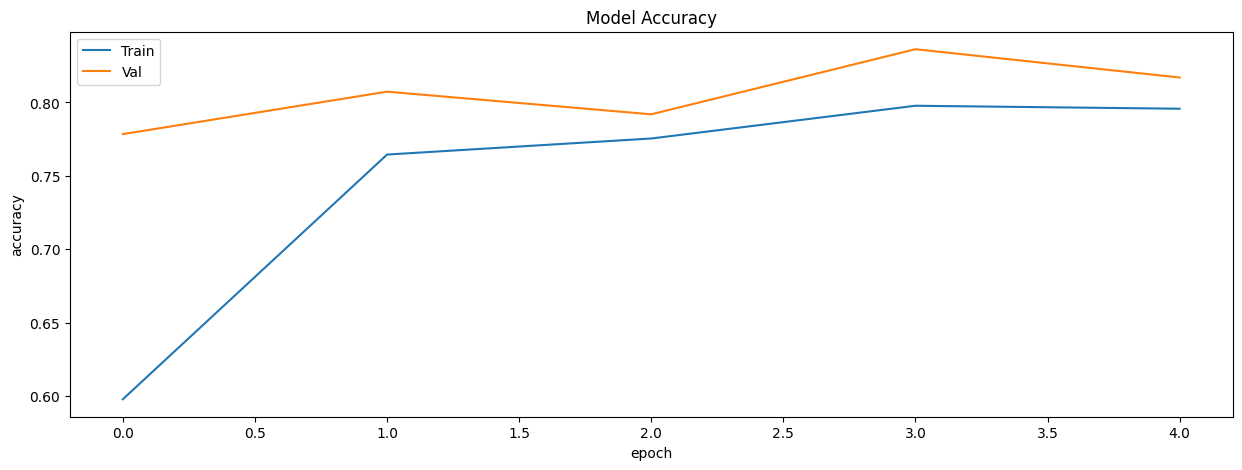

In [56]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [57]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

17/17 [==============================] - 3s 165ms/step


In [59]:
results =model.evaluate(test_generator)

17/17 [==============================] - 3s 159ms/step - loss: 0.4295 - accuracy: 0.8170


In [60]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       0.86      0.68      0.76       219
           1       0.80      0.92      0.85       300

    accuracy                           0.82       519
   macro avg       0.83      0.80      0.81       519
weighted avg       0.82      0.82      0.81       519



7/7 [==============================] - 1s 155ms/step


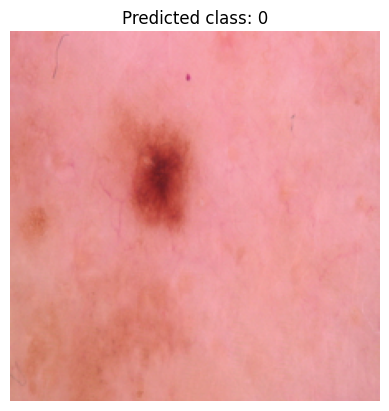

In [61]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/content/drive/MyDrive/dataset/skinCancer/test/benign'
img_size = 224

images = []
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [62]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : benign
Class probability: 0.9954592
Predicted class for 2.jpg : benign
Class probability: 0.9953675
Predicted class for 3.jpg : benign
Class probability: 0.99132264
Predicted class for 4.jpg : benign
Class probability: 0.9485368
Predicted class for 5.jpg : malignant
Class probability: 0.5874762
Predicted class for 6.jpg : benign
Class probability: 0.99524564
Predicted class for 7.jpg : benign
Class probability: 0.9887932
Predicted class for 8.jpg : benign
Class probability: 0.9953377
Predicted class for 9.jpg : benign
Class probability: 0.9946091
Predicted class for 10.jpg : benign
Class probability: 0.99644643
Predicted class for 11.jpg : malignant
Class probability: 0.5904089
Predicted class for 12.jpg : benign
Class probability: 0.9963741
Predicted class for 13.jpg : malignant
Class probability: 0.6924605
Predicted class for 14.jpg : malignant
Class probability: 0.5900322
Predicted class for 15.jpg : malignant
Class probability: 0.7043755
Predicted class 

# Thank You !